> Created on Wed Dec 28 10:36:48 2022 @author: Richie Bao-caDesign设计(cadesign.cn)

## 2.8.1 NetworkX复杂网络与公共交通复合网络构建

### 2.7.1.1 复杂网络基础

#### 1）构建复杂网络

* 节点（Nodes）

In [365]:
import networkx as nx

G=nx.Graph()
G.add_node("a")
G.add_nodes_from(["b", "c"])
G.add_nodes_from([
    ("d", {"color": "red"}),
    ("e", {"color": "green"}),
])

H=nx.path_graph(5)
G.add_nodes_from(H)

#E=nx.lollipop_graph(3, 4)
#G.add_node(E)

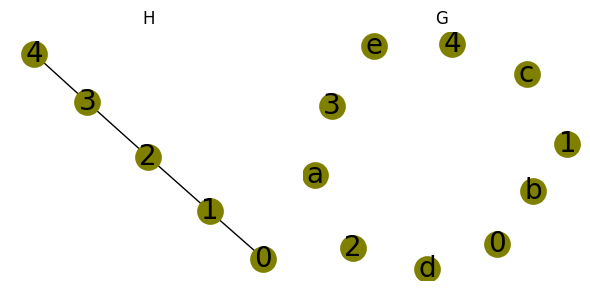

In [366]:
import matplotlib.pyplot as plt

options = {
    "font_size": 20,
    "font_color":"black",
    "node_size": 150,
    "node_color": "olive",
    "edgecolors": "olive",
    "linewidths": 7,
    "width": 1,
    "with_labels":True
}

fig,ax=plt.subplots(1,2,figsize=(6,3),tight_layout=True) 
nx.draw(H, pos=nx.spring_layout(H),ax=ax[0],**options)
#nx.draw(E, pos=nx.spring_layout(E),ax=ax[1],**options)
nx.draw(G, pos=nx.spring_layout(G),ax=ax[1],**options)
for i, facet in enumerate(ax):
    facet.set_title(("H", "G")[i])
    facet.axis("off")
plt.show()

* 边（Edges）

In [367]:
G.add_edge("b","c")
G.add_edge(0,"a")
e=("c","d")
G.add_edge(*e)
G.add_edges_from([("a", "b"), ("a", "c")])
G.add_edges_from(H.edges)

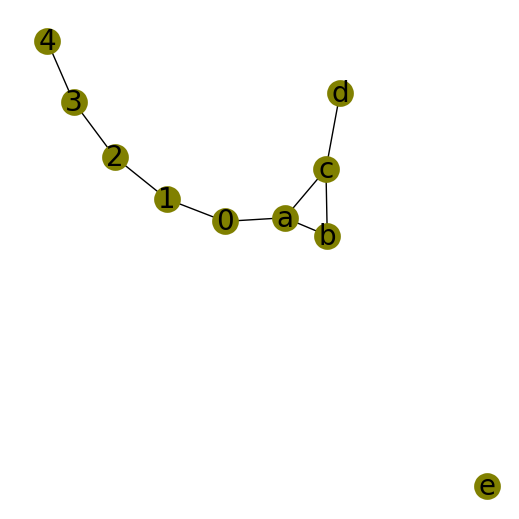

In [368]:
fig=plt.figure(1, figsize=(5, 5), dpi=100)
nx.draw(G, pos=nx.spring_layout(G),**options)

* 添加属性

__图属性__

In [369]:
J=nx.Graph(day="Friday")
print(J.graph)
J.graph['day']="Monday"
print(J.graph)

{'day': 'Friday'}
{'day': 'Monday'}


In [370]:
G.graph['day']="Monday"
G.graph

{'day': 'Monday'}

__节点属性__

In [371]:
G.add_node("a", time='5pm')
G.add_nodes_from(["f"], time='2pm')
print(G.nodes["f"])
G.nodes["f"]['room']=714
print(G.nodes["f"])

{'time': '2pm'}
{'time': '2pm', 'room': 714}


In [372]:
G.nodes.data()

NodeDataView({'a': {'time': '5pm'}, 'b': {}, 'c': {}, 'd': {'color': 'red'}, 'e': {'color': 'green'}, 0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 'f': {'time': '2pm', 'room': 714}})

__边属性__

In [373]:
G.add_edge(1, 2, weight=4.7)
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
print(G[1][2])
print(G[1][2]['weight'])
print(G[1][2]['color'])

{'weight': 4.7, 'color': 'blue'}
4.7
blue


* 网络元素提取

In [374]:
print(f"G number of nodes:{G.number_of_nodes()}\nG number of edges:{G.number_of_edges()}")
print(f"G nodes:{G.nodes}\nG edges:{G.edges}")

G number of nodes:12
G number of edges:10
G nodes:['a', 'b', 'c', 'd', 'e', 0, 1, 2, 3, 4, 'f', 5]
G edges:[('a', 0), ('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd'), (0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]


In [375]:
print(G.adj["a"])
print(G.degree["a"])
print("-"*50)
print(G.adj["b"])
print(G.degree["b"])

{0: {}, 'b': {}, 'c': {}}
3
--------------------------------------------------
{'c': {}, 'a': {}}
2


In [376]:
print(G[1])
print(G[1][2])
print(G.edges[1,2])
print(G.edges[1,2]['color'])

{0: {}, 2: {'weight': 4.7, 'color': 'blue'}}
{'weight': 4.7, 'color': 'blue'}
{'weight': 4.7, 'color': 'blue'}
blue


In [377]:
FG=nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
    for nbr, eattr in nbrs.items():
        wt=eattr['weight']
        if wt<0.5: print(f"({n}, {nbr}, {wt:.3})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [378]:
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5:
        print(f"({u}, {v}, {wt:.3})")

(1, 2, 0.125)
(3, 4, 0.375)


* 网络元素操作

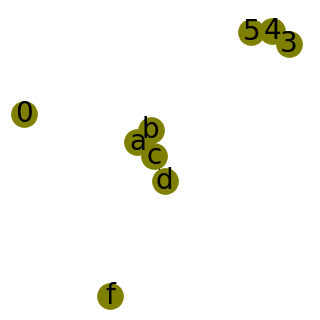

In [379]:
G.remove_node("e")
G.remove_nodes_from([1,2])
G.remove_edge("a", 0)

fig=plt.figure(1, figsize=(3, 3), dpi=100)
nx.draw(G, pos=nx.spring_layout(G),**options)

* 有向图（Directed graphs）

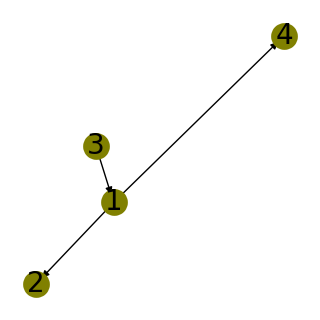

In [380]:
DG=nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75),(1,4,0.1)])

fig=plt.figure(1, figsize=(3, 3), dpi=100)
nx.draw(DG, pos=nx.spring_layout(DG),**options)

In [381]:
print(DG.out_degree(1, weight='weight'))
print(DG.in_degree(1, weight='weight'))
print(DG.degree(1, weight='weight'))
print(list(DG.successors(1)))
print(list(DG.neighbors(1)))

0.6
0.75
1.35
[2, 4]
[2, 4]


* 图的构造函数

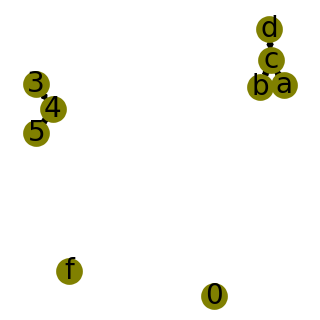

In [396]:
K=nx.DiGraph(G) 
fig=plt.figure(1, figsize=(3, 3), dpi=100)
nx.draw(K, pos=nx.spring_layout(K),**options)

In [383]:
print(f"H edges:{K.edges}")

H edges:[('a', 'b'), ('a', 'c'), ('b', 'c'), ('b', 'a'), ('c', 'b'), ('c', 'd'), ('c', 'a'), ('d', 'c'), (3, 4), (4, 3), (4, 5), (5, 4)]


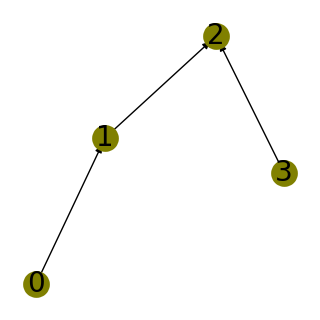

In [384]:
edgelist=[(0, 1), (1, 2), (3,2)]
S=nx.DiGraph(edgelist)

fig=plt.figure(1, figsize=(3, 3), dpi=100)
nx.draw(S, pos=nx.spring_layout(S),**options)

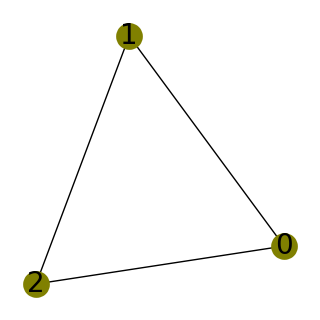

In [385]:
adjacency_dict={0: (1, 2), 1: (0, 2), 2: (0, 1)}

F=nx.Graph(adjacency_dict)
fig=plt.figure(1, figsize=(3, 3), dpi=100)
nx.draw(F, pos=nx.spring_layout(F),**options)

* 网络读写

In [272]:
nx.write_gml(G, "./data/G.gml")

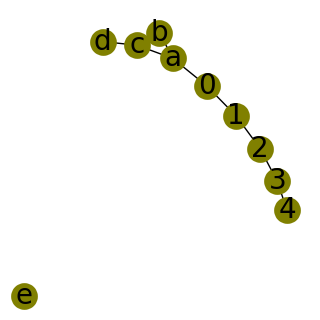

In [392]:
U=nx.read_gml("./data/G.gml")
fig=plt.figure(1, figsize=(3, 3), dpi=100)
nx.draw(U, pos=nx.spring_layout(U),**options)

* 算法

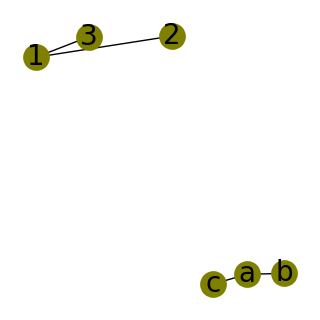

In [387]:
Q=nx.Graph()
Q.add_weighted_edges_from([(1, 2,0.1), (1, 3,0.1)])
Q.add_weighted_edges_from([("a","b",3),("c","a",3)]) 
fig=plt.figure(1, figsize=(3, 3), dpi=100)
nx.draw(Q, pos=nx.spring_layout(Q),**options)

In [388]:
print(list(nx.connected_components(Q)))

[{1, 2, 3}, {'b', 'c', 'a'}]


In [389]:
nx.clustering(Q,weight='weight' )

{1: 0, 2: 0, 3: 0, 'a': 0, 'b': 0, 'c': 0}

In [390]:
sp=dict(nx.all_pairs_shortest_path(Q))
sp

{1: {1: [1], 2: [1, 2], 3: [1, 3]},
 2: {2: [2], 1: [2, 1], 3: [2, 1, 3]},
 3: {3: [3], 1: [3, 1], 2: [3, 1, 2]},
 'a': {'a': ['a'], 'b': ['a', 'b'], 'c': ['a', 'c']},
 'b': {'b': ['b'], 'a': ['b', 'a'], 'c': ['b', 'a', 'c']},
 'c': {'c': ['c'], 'a': ['c', 'a'], 'b': ['c', 'a', 'b']}}

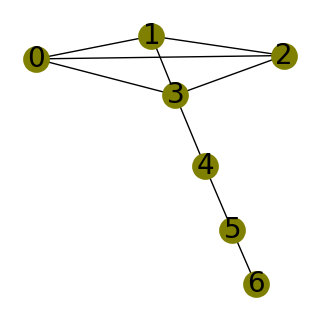

In [391]:
Z=nx.lollipop_graph(4, 3)
fig=plt.figure(1, figsize=(3, 3), dpi=100)
nx.draw(Z, pos=nx.spring_layout(Z),**options)

In [344]:
sp=dict(nx.all_pairs_shortest_path(Z))
sp[0]

{0: [0],
 1: [0, 1],
 2: [0, 2],
 3: [0, 3],
 4: [0, 3, 4],
 5: [0, 3, 4, 5],
 6: [0, 3, 4, 5, 6]}

### 2.7.1.2 公共交通复合网络构建

#### 1）数据预处理

In [105]:
from database import postSQL2gpd,gpd2postSQL,df2postSQL,postSQL2df
from util_misc import AttrDict
__C=AttrDict() 
args=__C

__C.db=AttrDict() 
__C.db.UN='postgres'
__C.db.PW='123456'
__C.db.DB='public_transportation'
__C.db.GC='geometry' 
__C.db.db_info=dict(geom_col=args.db.GC,myusername=args.db.UN,mypassword=args.db.PW,mydatabase=args.db.DB)

__C.gi=AttrDict()
__C.gi.nanjing_epsg=32650
__C.gi.beijing_epsg=32750
__C.gi.epsg_wgs84=4326

__C.data=AttrDict()
__C.data.bus_routes='./data/nanjing_bus_route_and_station/bus_routes.shp'
__C.data.bus_stations='./data/nanjing_bus_route_and_station/bus_stations.shp'
__C.data.subway_lines='./data/nanjing_subway_station_and_line/subway_lines.shp'
__C.data.subway_stations='./data/nanjing_subway_station_and_line/subway_stations.shp'
__C.data.region='./data/nanjing_region/region.shp'
__C.data.administrative_districts='./data/nanjing_administrative_districts/nanjing_administrative_districts.shp'
__C.data.population='./data/nanjing_population/population.shp'
__C.data.comprehensive_park='./data/NanjingParks.kml'
__C.data.geolife='G:\data\Geolife'
__C.data.geolife_gdf='E:\data\geolife.gpkg'

* 南京省市边界读写

original data info:(1, 3)
dropna-how=all,result:(1, 3)
dropna-several rows,result:(1, 3)
epsg:32650


<AxesSubplot: >

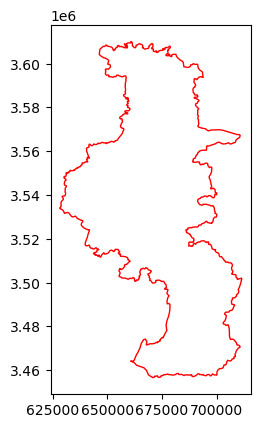

In [49]:
from database import shp2gdf

region=shp2gdf(args.data.region,epsg=args.gi.nanjing_epsg)
region.plot(color='none', edgecolor='red')   

In [6]:
region

,NAME,KIND,geometry
0,南京市,0137,"POLYGON ((661383.381 3609433.909, 661397.682 3..."


In [7]:
gpd2postSQL(region,table_name='region',**args.db.db_info)   

__________________________________________________
The GeoDataFrame has been written to the PostgreSQL database.The table name is region.


* 南京公交线路读写

In [36]:
bus_routes=shp2gdf(args.data.bus_routes,epsg=args.gi.nanjing_epsg,boundary=region.envelope[0])

original data info:(1304, 9)
dropna-how=all,result:(1304, 8)
dropna-several rows,result:(1304, 8)
epsg:32650


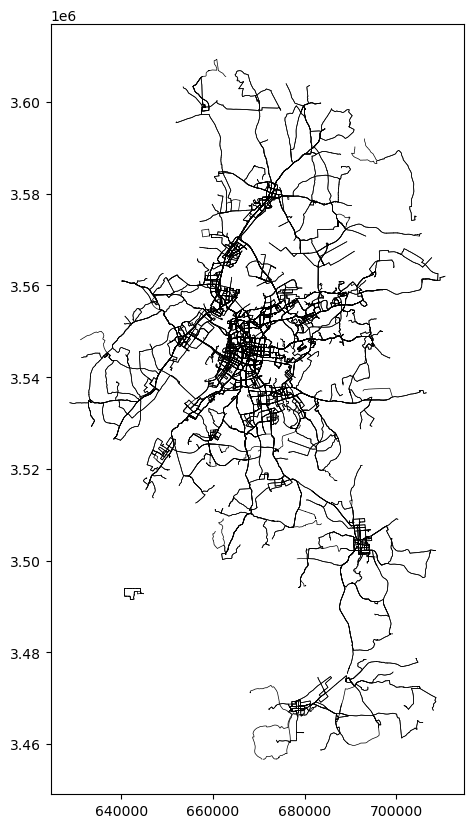

In [40]:
fig, ax=plt.subplots(figsize=(10,10))
bus_routes.plot(ax=ax,edgecolor='black',linewidth=0.5,zorder=1)
plt.show()

In [27]:
bus_routes.head(3)

,LineName,LineUid,StartTime,EndTime,WorkTimeDe,Direction,Price,geometry,mask
0,b'100\xc2\xb7(\xb0\xb2\xb5\xc2\xc3\xc5-\xc4\xc...,079645c8210ef240754ff11b,05:15,22:00,b'\xd6\xdc\xd2\xbb\xd6\xc1\xd6\xdc\xce\xe5 05:...,b'\xc4\xcf\xd2\xbd\xb4\xf3\xb6\xfe\xb8\xbd\xd4...,2,"LINESTRING (666050.917 3541333.928, 666097.166...",True
1,b'100\xc2\xb7(\xc4\xcf\xd2\xbd\xb4\xf3\xb6\xfe...,36ee56fea9cfa740cb09f01b,06:00,22:45,b'\xd6\xdc\xd2\xbb\xd6\xc1\xd6\xdc\xce\xe5 06:...,b'\xb0\xb2\xb5\xc2\xc3\xc5\xb7\xbd\xcf\xf2',2,"LINESTRING (664155.059 3551020.254, 664158.656...",True
2,b'100\xc2\xb7\xc7\xf8\xbc\xe4(\xcf\xc2\xce\xe7...,0c835f11c853cb5cb5147fdf,15:30,18:40,b'\xd6\xdc\xd2\xbb\xd6\xc1\xd6\xdc\xce\xe5 \xc...,b'\xb0\xb2\xb5\xc2\xc3\xc5\xb7\xbd\xcf\xf2',2,"LINESTRING (664034.596 3535151.892, 664093.486...",True


In [28]:
gpd2postSQL(bus_routes,table_name='bus_routes',**args.db.db_info)   

__________________________________________________
The GeoDataFrame has been written to the PostgreSQL database.The table name is bus_routes.


* 南京公交站点读写

In [30]:
bus_stations=shp2gdf(args.data.bus_stations,epsg=args.gi.nanjing_epsg,boundary=region.envelope[0])

original data info:(32661, 7)
dropna-how=all,result:(32661, 7)
dropna-several rows,result:(32661, 7)
epsg:32650


In [52]:
bus_stations.head(3)

,PointName,PointUid,Lng,Lat,LineName,LineUid,geometry,mask
0,b'\xb0\xb2\xb5\xc2\xc3\xc5',aa03446d998e65a4b45f1e9f,118.757782715597,31.9959552933912,b'100\xc2\xb7(\xb0\xb2\xb5\xc2\xc3\xc5-\xc4\xc...,079645c8210ef240754ff11b,POINT (666050.771 3541337.257),True
1,b'\xc4\xdc\xc8\xca\xc0\xef',78128091a7676747364aae39,118.76325592867,32.0017671207637,b'100\xc2\xb7(\xb0\xb2\xb5\xc2\xc3\xc5-\xc4\xc...,079645c8210ef240754ff11b,POINT (666557.365 3541990.011),True
2,b'\xd3\xea\xbb\xa8\xce\xf7\xc2\xb7',03d556af603b624329fc48b1,118.766595750239,32.0060341836557,b'100\xc2\xb7(\xb0\xb2\xb5\xc2\xc3\xc5-\xc4\xc...,079645c8210ef240754ff11b,POINT (666865.156 3542468.234),True


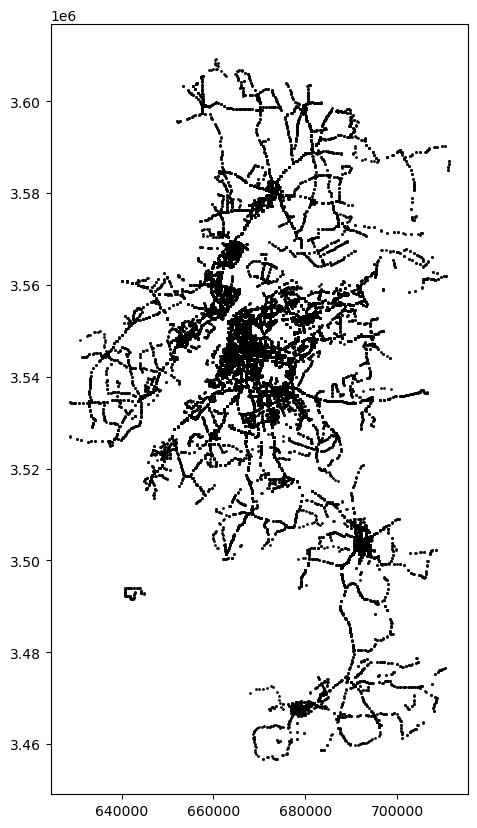

In [39]:
import matplotlib.pyplot as plt

fig, ax=plt.subplots(figsize=(10,10))
bus_stations.plot(ax=ax,color='black',markersize=1)
plt.show()

In [42]:
gpd2postSQL(bus_stations,table_name='bus_stations',**args.db.db_info)   

__________________________________________________
The GeoDataFrame has been written to the PostgreSQL database.The table name is bus_stations.


* 地铁线路读写

In [44]:
subway_lines=shp2gdf(args.data.subway_lines,epsg=args.gi.nanjing_epsg,boundary=region.envelope[0])

original data info:(20, 3)
dropna-how=all,result:(20, 3)
dropna-several rows,result:(20, 3)
epsg:32650


In [46]:
subway_lines.head(3)

,LineName,LineUid,geometry,mask
0,b'\xb5\xd8\xcc\xfas9\xba\xc5\xcf\xdf(\xb8\xdf\...,79743ab26a494368f8dc8594,"LINESTRING (678118.443 3469180.910, 679000.152...",True
1,b'\xb5\xd8\xcc\xfas3\xba\xc5\xcf\xdf(\xb8\xdf\...,d4a8b8c00653bd44c17da208,"LINESTRING (642965.556 3531558.066, 644261.635...",True
2,b'\xb5\xd8\xcc\xfas7\xba\xc5\xcf\xdf(\xce\xde\...,de67974fbfba8d7ca1d2309c,"LINESTRING (693615.069 3499371.258, 693565.026...",True


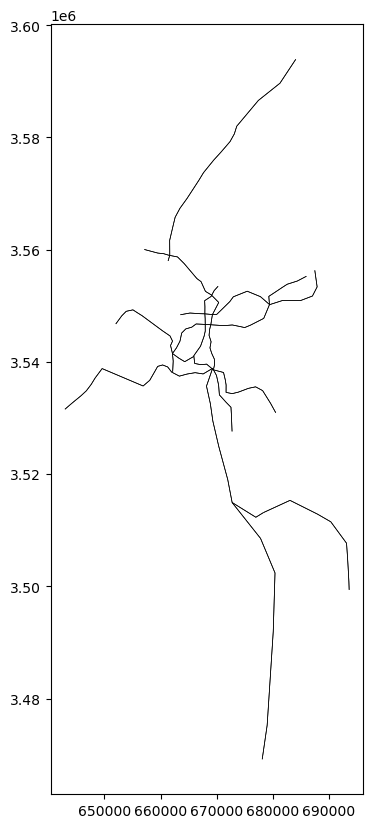

In [45]:
fig, ax=plt.subplots(figsize=(10,10))
subway_lines.plot(ax=ax,edgecolor='black',linewidth=0.5,zorder=1)
plt.show()

In [47]:
gpd2postSQL(subway_lines,table_name='subway_lines',**args.db.db_info)  

__________________________________________________
The GeoDataFrame has been written to the PostgreSQL database.The table name is subway_lines.


* 地铁站点读写

In [48]:
subway_stations=shp2gdf(args.data.subway_stations,epsg=args.gi.nanjing_epsg,boundary=region.envelope[0])

original data info:(348, 8)
dropna-how=all,result:(348, 8)
dropna-several rows,result:(348, 8)
epsg:32650


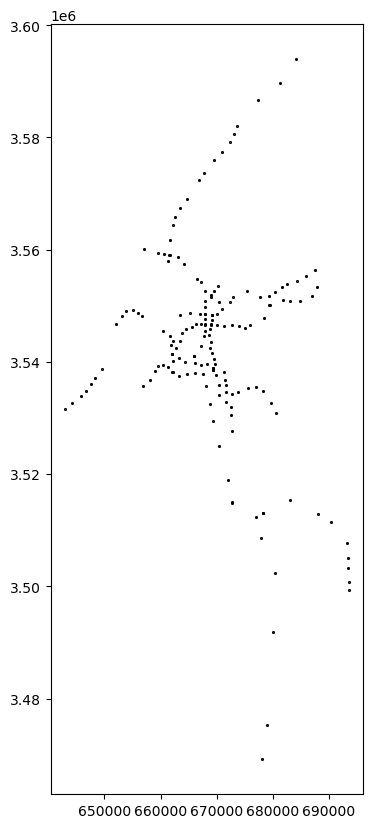

In [49]:
fig, ax=plt.subplots(figsize=(10,10))
subway_stations.plot(ax=ax,color='black',markersize=1)
plt.show()

In [51]:
subway_stations.head(3)

,PointName,PointUid,Lng,Lat,IsPractica,LineName,LineUid,geometry,mask
0,b'\xb8\xdf\xb4\xbe',e4fe1091444ba694e311039c,118.872368478559,31.3434577890014,0,b'\xb5\xd8\xcc\xfas9\xba\xc5\xcf\xdf(\xb8\xdf\...,79743ab26a494368f8dc8594,POINT (678118.443 3469180.910),True
1,b'\xcd\xc5\xbd\xe1\xdb\xd7',41396371183dc24fb9df8fea,118.882721967772,31.3979546349684,1,b'\xb5\xd8\xcc\xfas9\xba\xc5\xcf\xdf(\xb8\xdf\...,79743ab26a494368f8dc8594,POINT (679000.152 3475239.180),True
2,b'\xc3\xf7\xbe\xf5',2f7777a37adc2c0d88db732f,118.897155970304,31.5482455693243,0,b'\xb5\xd8\xcc\xfas9\xba\xc5\xcf\xdf(\xb8\xdf\...,79743ab26a494368f8dc8594,POINT (680084.557 3491924.198),True


In [50]:
gpd2postSQL(subway_stations,table_name='subway_stations',**args.db.db_info)  

__________________________________________________
The GeoDataFrame has been written to the PostgreSQL database.The table name is subway_stations.


* 城市公园数据读写

In [35]:
def kml2gdf(fn,epsg=None,boundary=None): 
    import pandas as pd
    import geopandas as gpd
    import fiona,io
    from tqdm import tqdm
    
    gpd.io.file.fiona.drvsupport.supported_drivers['KML']='rw' # Enable fiona driver
    kml_gdf=gpd.GeoDataFrame()
    for layer in tqdm(fiona.listlayers(fn)):
        src=fiona.open(fn, layer=layer)
        meta=src.meta
        meta['driver']='KML'        
        with io.BytesIO() as buffer:
            with fiona.open(buffer, 'w', **meta) as dst:            
                for i, feature in enumerate(src):
                    if len(feature['geometry']['coordinates'][0]) > 1:
                        dst.write(feature)

            buffer.seek(0)
            one_layer=gpd.read_file(buffer,driver='KML')
            one_layer['group']=layer
            kml_gdf=kml_gdf.append(one_layer,ignore_index=True)

    if epsg is not None:
        kml_gdf_proj=kml_gdf.to_crs(epsg=epsg)

    if boundary:
        kml_gdf_proj['mask']=kml_gdf_proj.geometry.apply(lambda row:row.within(boundary))
        kml_gdf_proj.query('mask',inplace=True)        

    return kml_gdf_proj

In [36]:
comprehensive_park=kml2gdf(args.data.comprehensive_park,epsg=args.gi.nanjing_epsg,boundary=None) 

  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\richi\AppData\Local\Temp\ipykernel_27844\327095372.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kml_gdf=kml_gdf.append(one_layer,ignore_index=True)
100%|██████████| 1/1 [00:00<00:00, 11.44it/s]


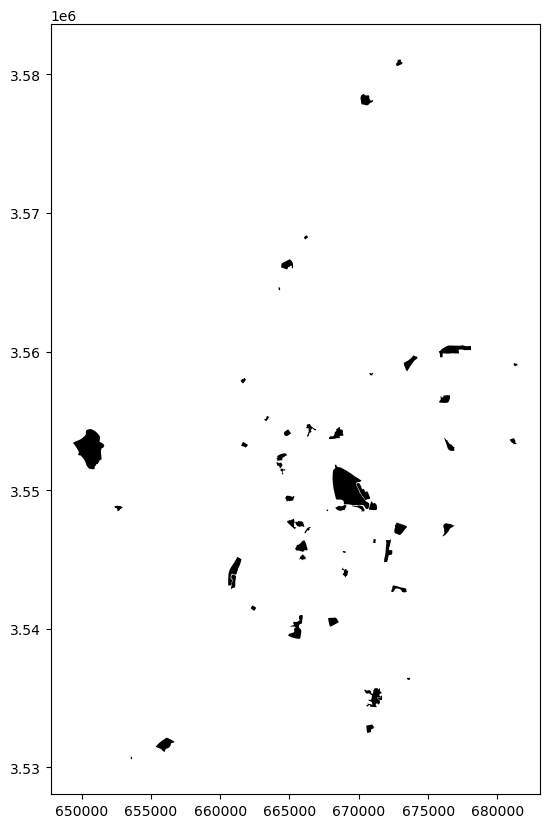

In [70]:
import matplotlib.pyplot as plt

fig, ax=plt.subplots(figsize=(10,10))
comprehensive_park.plot(ax=ax,color='black')
plt.show()

In [12]:
comprehensive_park.head(3)

,Name,Description,geometry,group
0,八字山公园,,"POLYGON Z ((664351.229 3551540.582 0.000, 6643...",NanjingParks
1,北崮山公园,,"POLYGON Z ((667855.803 3553692.487 0.000, 6678...",NanjingParks
2,大桥公园,,"POLYGON Z ((664898.358 3554394.776 0.000, 6648...",NanjingParks


In [15]:
comprehensive_park_name_mapping={
    '八字山公园':'Bazi Mountain',
    '北崮山公园':'Beigu Mountain',
    '大桥公园':'Bridge park',
    '古林公园':'Ancient Forest',
    '鼓楼公园':'Drum Tower',
    '老虎山公园':'Tiger Mountain',
    '幕府山公园':'Mufu Mountain',
    '清凉山公园':'Qingliang Mountain',
    '狮子山公园':'Lion Rock Mountain',
    '石头城公园':'Stone City Park',
    '乌龙潭公园':'Wulong Pool',
    '绣球公园':'Xiuqing Park',
    '河西中央公园':'Hexi Central Park',
    '绿博园':'Green EXPO Garden',
    '滨江公园':'Riverside Park',
    '莫愁湖公园':'Mochou Lake',
    '南湖公园':'South Lake',
    '百家湖公园':'Baijia Lake',
    '凤凰公园':'Phoenix Park',
    '九龙湖公园':'Jiulong Park',
    '竹山公园':'Zhushan Park',
    '九龙公园':'Jiulong Park',
    '六合凤凰山公园':'Liuhe Phoenix Mountain',
    '龙池公园':'Dragon Pool',
    '平顶山公园':'Pingding Mountain',
    '太子山公园':'Prince Mountain',
    '宝塔山公园':'Pagoda Hill',
    '北堡公园':'North Fort',
    '凤凰山公园':'Phoenix Mountain',
    '浦口公园':'Pukou Park',
    '二桥公园':'Two Bridges Park',
    '南炼公园':'Nanlian Park',
    '三叶湖公园':'Three Leaf Lake',
    '太平山公园':'Taiping Hill',
    '乌龙山公园':'Wulong Mountain',
    '燕子矶公园':'Swallow Rock',
    '白鹭洲公园':'Egret Island',
    '七桥瓮公园':'Qiqiaoweng Park',
    '午朝门公园':'Wuchaomen Park',
    '月牙湖公园':'Crescent Lake',
    '郑和公园':'Zhenghe Park',
    '白马公园':'White House Park',
    '北极阁公园':'Arctic Pavilion',
    '九华山公园':'Jiuhua Mountain',
    '聚宝山公园':'Treasure Hill',
    '梅花谷公园':'Plum Blossom Valley',
    '情侣园':'Couples Garden',
    '体育学院南公园':'South Park of Sports Institute',
    '玄武湖公园':'Xuanwu Lake',
    '花神湖公园':'Flora Lake',
    '菊花台公园':'Chrysanthemums Terrace',
    '莲花湖公园':'Lotus Lake',
    '梅山公园':'Plum Blossom Hill',          
    }

In [18]:
comprehensive_park['Name']=comprehensive_park.Name.apply(lambda row:row.strip())
comprehensive_park['Name_EN']=comprehensive_park['Name'].map(comprehensive_park_name_mapping)
comprehensive_park.head(3)

,Name,Description,geometry,group,Name_EN
0,八字山公园,,"POLYGON Z ((664351.229 3551540.582 0.000, 6643...",NanjingParks,Bazi Mountain
1,北崮山公园,,"POLYGON Z ((667855.803 3553692.487 0.000, 6678...",NanjingParks,Beigu Mountain
2,大桥公园,,"POLYGON Z ((664898.358 3554394.776 0.000, 6648...",NanjingParks,Bridge park


In [19]:
gpd2postSQL(comprehensive_park,table_name='comprehensive_park',**args.db.db_info)  

__________________________________________________
The GeoDataFrame has been written to the PostgreSQL database.The table name is comprehensive_park.


* 邻里站点提取

In [23]:
import pandas as pd

bus_stations=postSQL2gpd(table_name='bus_stations',**args.db.db_info)   
subway_stations=postSQL2gpd(table_name='subway_stations',**args.db.db_info)   

columns=['PointUid','geometry']
stations=pd.concat([bus_stations[columns],subway_stations[columns]],ignore_index=True)

__________________________________________________
The data has been read from PostgreSQL database. The table name is bus_stations.
__________________________________________________
The data has been read from PostgreSQL database. The table name is subway_stations.


In [24]:
stations.head(3)

,PointUid,geometry
0,aa03446d998e65a4b45f1e9f,POINT (666050.771 3541337.257)
1,78128091a7676747364aae39,POINT (666557.365 3541990.011)
2,03d556af603b624329fc48b1,POINT (666865.156 3542468.234)


In [42]:
def adjacent_pts(polygons_gdf,pts_gdf,buffer_distance=200):
    from shapely.geometry import MultiPoint,Polygon,Point
    from copy import deepcopy
    import geopandas as gpd
    
    adjacentpts_gdf=deepcopy(polygons_gdf)
    
    def adjacent_pts_gdf_single_multipoint(geo_polygon,return_type='mp'):
        buffer=geo_polygon.buffer(buffer_distance,join_style=1)
        pts_gdf['within']=pts_gdf.geometry.apply(lambda g:g.within(buffer)) 
        pts_gdf_within=pts_gdf[pts_gdf['within'].values]
                
        if return_type=='mp':
            return MultiPoint(pts_gdf_within['geometry'].to_list())
        elif return_type=='pu':
            return pts_gdf_within.PointUid.to_list()
        
    adjacentpts_gdf['adjacent_pts_gdf']=adjacentpts_gdf.geometry.apply(adjacent_pts_gdf_single_multipoint,args=('mp',))
    adjacentpts_gdf['adjacent_PointUid']=adjacentpts_gdf.geometry.apply(adjacent_pts_gdf_single_multipoint,args=('pu',))
    adjacentpts_gdf.rename(columns={'geometry':'geo_park','adjacent_pts_gdf':'geometry'},inplace=True)   
    adjacentpts_gdf['adjacent_num']=adjacentpts_gdf.adjacent_PointUid.apply(lambda row:len(row))
    adjacentpts_gdf['park_perimeter']=adjacentpts_gdf.apply(lambda row:row.geo_park.length,axis=1)
    adjacentpts_gdf['park_area']=adjacentpts_gdf.apply(lambda row:row.geo_park.area,axis=1)
    adjacentpts_gdf['adjacent_perimeterRatio']=adjacentpts_gdf.apply(lambda row:len(row.adjacent_PointUid)/row.geo_park.length,axis=1)
    adjacentpts_gdf['adjacent_areaRatio']=adjacentpts_gdf.apply(lambda row:len(row.adjacent_PointUid)/row.geo_park.area,axis=1)    
    
    buffer_gdf=deepcopy(adjacentpts_gdf)
    buffer_gdf['buffer']=buffer_gdf.geo_park.apply(lambda row:row.buffer(buffer_distance,join_style=1))
    buffer_gdf.drop(['geometry','geo_park'],axis=1,inplace=True)
    buffer_gdf.rename(columns={'buffer':'geometry'},inplace=True)
        
    adjacentpts_gdf.drop(['geo_park'],axis=1,inplace=True)
    return adjacentpts_gdf,buffer_gdf

comprehensivePark_adjacentStations,comprehensivePark_buffer=adjacent_pts(comprehensive_park,stations,buffer_distance=400) 

In [43]:
comprehensivePark_buffer.head(3)

,Name,Description,group,adjacent_PointUid,adjacent_num,park_perimeter,park_area,adjacent_perimeterRatio,adjacent_areaRatio,geometry
0,八字山公园,,NanjingParks,"[3176ab8f267a522adc1e5249, 13627db9677fe868086...",58,1498.063650,58555.986474,0.038717,0.000991,"POLYGON ((663972.964 3551670.642, 663979.695 3..."
1,北崮山公园,,NanjingParks,"[c7b453844859a109e6e96551, 3a35fc72daefc4b516a...",46,3374.373940,429974.743870,0.013632,0.000107,"POLYGON ((667455.811 3553695.094, 667456.223 3..."
2,大桥公园,,NanjingParks,"[e16200a462b5e86eaf080f13, 9bb91a554c924a9629f...",14,1501.575973,152867.454776,0.009324,0.000092,"POLYGON ((664485.150 3553599.191, 664459.012 3..."


In [44]:
comprehensivePark_adjacentStations.head(3)

,Name,Description,group,geometry,adjacent_PointUid,adjacent_num,park_perimeter,park_area,adjacent_perimeterRatio,adjacent_areaRatio
0,八字山公园,,NanjingParks,"MULTIPOINT (664855.439 3551547.768, 664432.335...","[3176ab8f267a522adc1e5249, 13627db9677fe868086...",58,1498.063650,58555.986474,0.038717,0.000991
1,北崮山公园,,NanjingParks,"MULTIPOINT (668098.717 3554664.629, 668137.023...","[c7b453844859a109e6e96551, 3a35fc72daefc4b516a...",46,3374.373940,429974.743870,0.013632,0.000107
2,大桥公园,,NanjingParks,"MULTIPOINT (664957.333 3553981.379, 664934.772...","[e16200a462b5e86eaf080f13, 9bb91a554c924a9629f...",14,1501.575973,152867.454776,0.009324,0.000092


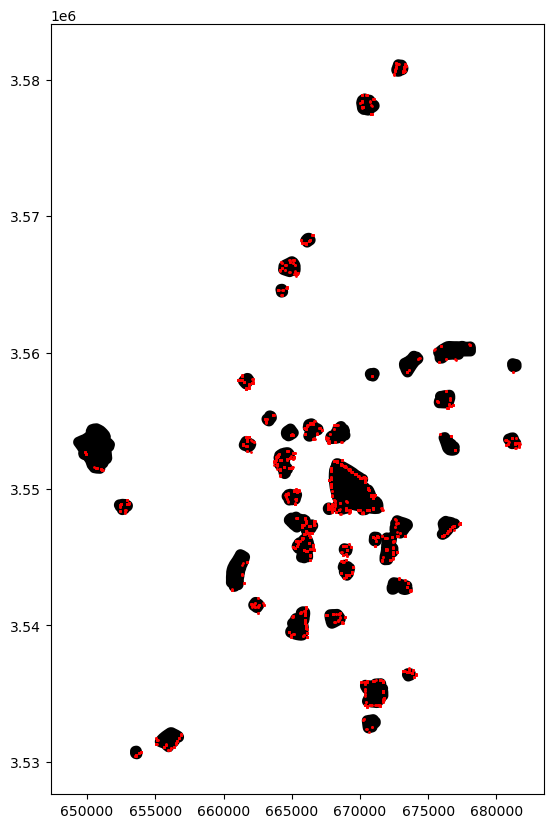

In [69]:
fig, ax=plt.subplots(figsize=(10,10))
comprehensivePark_buffer.plot(ax=ax,color='black')
comprehensivePark_adjacentStations.plot(ax=ax,color='red',markersize=1)
plt.show()

In [47]:
gpd2postSQL(comprehensivePark_adjacentStations,table_name='adjacent_stations',**args.db.db_info)  
gpd2postSQL(comprehensivePark_buffer,table_name='park_buffer',**args.db.db_info)  

__________________________________________________
The GeoDataFrame has been written to the PostgreSQL database.The table name is adjacent_stations.
__________________________________________________
The GeoDataFrame has been written to the PostgreSQL database.The table name is park_buffer.


* 人口分布数据读写

In [54]:
population=shp2gdf(args.data.population,epsg=args.gi.nanjing_epsg)

original data info:(6673, 4)
dropna-how=all,result:(6673, 4)
dropna-several rows,result:(6673, 4)
epsg:32650


In [55]:
population.head(3)

,Lat,Lng,Population,geometry
0,31.9497433580896,118.378427463393,129,POINT (630276.381 3535694.515)
1,31.9497433580896,118.400885345496,129,POINT (632399.081 3535721.765)
2,31.9230613713896,118.405376921916,386,POINT (632862.009 3532769.406)


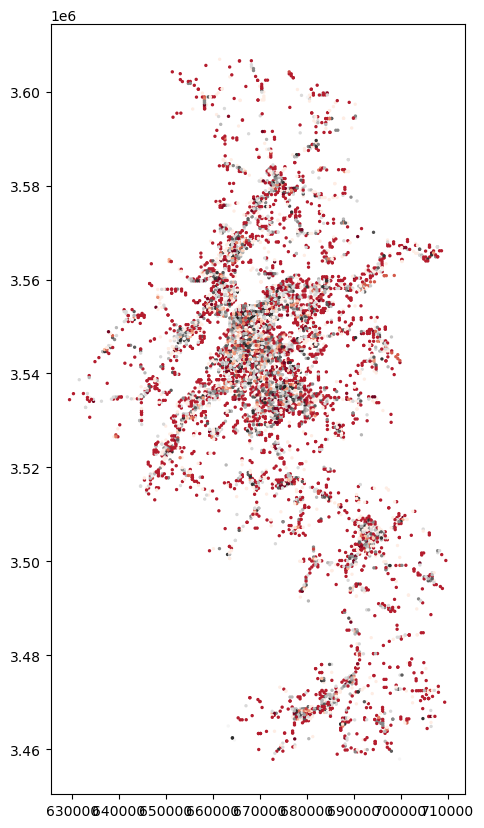

In [64]:
fig, ax=plt.subplots(figsize=(10,10))
population.plot(ax=ax,column='Population',markersize=2,cmap='RdGy')
plt.show()

In [65]:
gpd2postSQL(population,table_name='population',**args.db.db_info) 

__________________________________________________
The GeoDataFrame has been written to the PostgreSQL database.The table name is population.


* 行政区划读写

In [79]:
administrative_districts=shp2gdf(args.data.administrative_districts,epsg=args.gi.nanjing_epsg,encoding='GBK')

original data info:(117, 15)
dropna-how=all,result:(117, 14)
dropna-several rows,result:(117, 14)
epsg:32650


In [80]:
administrative_districts_name_mapping={
                                        '玄武区':'Xuanwu District', 
                                        '白下区':'Baixia District', 
                                        '建邺区':'Jianye District', 
                                        '下关区':'Xiaguan District', 
                                        '栖霞区':'Qixia District', 
                                        '六合区':'Liuhe District', 
                                        '鼓楼区':'Gulou District', 
                                        '秦淮区':'Qianhuai District', 
                                        '浦口区':'Pukou District',
                                        '雨花台区':'Yuhuatai District', 
                                        '江宁区':'Jiangning District', 
                                        '溧水县':'Lishui Country', 
                                        '高淳县':'Gaochun Country',        
                                       }

administrative_districts.countyname=administrative_districts.countyname.apply(lambda row:row.strip())
administrative_districts['countyname_EN']=administrative_districts['countyname'].map(administrative_districts_name_mapping)
administrative_districts.drop(['gml_id', 'id', 'xzdm', 'Name',],inplace=True,axis=1)
aggregation_functions={'fldm':'first',  'area':'sum', 'cityname':'first', 'citycode':'first','countyname':'first', 'countycode':'first', 'province':'first', 'prvcode':'first', '人口密':'sum', 'countyname_EN':'first'}
administrative_districts_dissolved=administrative_districts.dissolve(by='countyname_EN',aggfunc=aggregation_functions)

In [81]:
administrative_districts_dissolved.head(3)

,geometry,fldm,area,cityname,citycode,countyname,countycode,province,prvcode,人口密,countyname_EN
countyname_EN,,,,,,,,,,,
Baixia District,"POLYGON ((673582.287 3544801.561, 673584.871 3...",1004,25.823915,南京市,320100000,白下区,320103000,江苏省,320000000,469795.950111,Baixia District
Gaochun Country,"POLYGON ((681070.030 3458114.671, 681026.836 3...",1004,792.063405,南京市,320100000,高淳县,320125000,江苏省,320000000,4365.512334,Gaochun Country
Gulou District,"POLYGON ((667832.696 3550002.540, 667834.611 3...",1004,24.819821,南京市,320100000,鼓楼区,320106000,江苏省,320000000,310646.327962,Gulou District


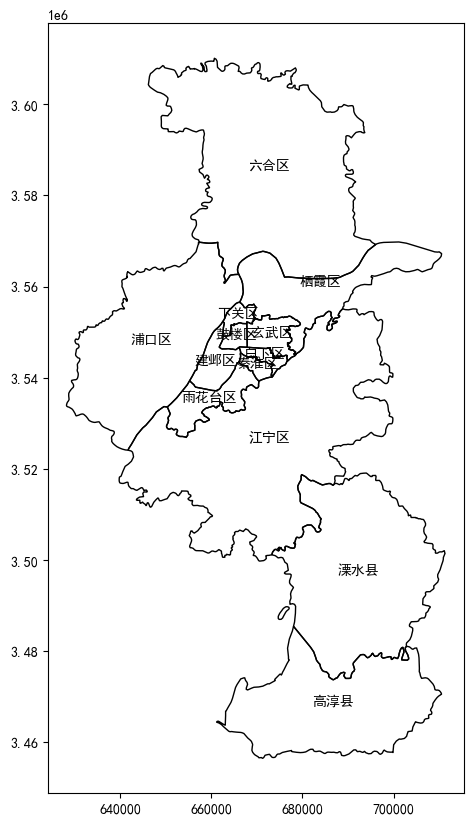

In [87]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']

fig, ax=plt.subplots(figsize=(10,10))
administrative_districts_dissolved.plot(ax=ax,color='none', edgecolor='k')
administrative_districts_dissolved.apply(lambda x: ax.annotate(text=x['countyname'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1);
plt.show()

In [88]:
gpd2postSQL(administrative_districts_dissolved,table_name='admin_distr',**args.db.db_info) 

__________________________________________________
The GeoDataFrame has been written to the PostgreSQL database.The table name is admin_distr.


#### 2）GeoLife数据与时速统计

* 合并GeoLife数据

In [96]:
def geolife_preprocessing(geolife_fp,fileType,epsg=None,boundary=None):
    import util_misc
    import os
    import pandas as pd
    from tqdm import tqdm
    from shapely.geometry import Point
    import geopandas as gpd
    
    '''
    function - geolife dataset preprocessing
    '''
    plt_columns=['Latitude','Longitude','code','altitude','date','date_str','time_str']
    plt_fns=util_misc.filePath_extraction(geolife_fp,fileType[0])
    plts_df=pd.DataFrame(columns=plt_columns)
    for root, fns in tqdm(plt_fns.items()):
        for fn in fns:
            fp=os.path.join(root,fn)
            plt_df=(pd.read_csv(fp, names=plt_columns, skiprows=6, sep=','))
            #plts_df=plts_df.append(plt_df,ignore_index=True)
            plts_df=pd.concat([plts_df, plt_df])
            # print(plt_df)   
        # break
    if boundary:
        plts_df['within']=plts_df.apply(lambda row:1 if boundary[2]<row.Latitude<boundary[0] and boundary[3]<row.Longitude<boundary[1] else 0,axis=1)
        plts_df=plts_df[plts_df['within']==1]
    # print(plts_df)
    plts_df['geometry']=plts_df.apply(lambda row:Point(row.Longitude,row.Latitude),axis=1)
    wgs_epsg=4326
    plts_gdf=gpd.GeoDataFrame(plts_df,crs=wgs_epsg)
    if epsg is not None:
        plts_gdf=plts_gdf.to_crs(epsg=epsg) 
    # print(plts_gdf)  
     
    labels_fns=util_misc.filePath_extraction(geolife_fp,fileType[1])
    # print(labels_fns)
    label_columns=['start_time','end_time','transportation_mode']
    labels_df=pd.DataFrame(columns=label_columns)
    for root, fns in tqdm(labels_fns.items()):
        for fn in fns:
            fp=os.path.join(root,fn)
            label_df=(pd.read_csv(fp, names=label_columns, skiprows=1, sep='\t'))
            #labels_df=labels_df.append(label_df,ignore_index=True)
            labels_df=pd.concat([labels_df,label_df],ignore_index=True)
    # print(labels_df)
    print("transportation_mode:{}".format(labels_df.transportation_mode.unique()))
    
    return plts_gdf,labels_df

In [97]:
boundary=[41.095365,117.756161,39.399080,115.095937] # right_coordinate(Lat,Lng) left coordinate(Lat,Lng)  ；Beijing region
geolife_gdf,geolife_labels_df=geolife_preprocessing(args.data.geolife,['plt','txt'],args.gi.beijing_epsg,boundary)

100%|██████████| 182/182 [2:46:20<00:00, 54.84s/it]   
C:\Users\richi\anaconda3\envs\usda\lib\site-packages\pandas\core\dtypes\cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
100%|██████████| 69/69 [00:00<00:00, 200.33it/s]


transportation_mode:['bus' 'train' 'taxi' 'walk' 'subway' 'airplane' 'car' 'bike' 'boat' 'run'
 'motorcycle']


In [101]:
geolife_gdf.head(3)

,Latitude,Longitude,code,altitude,date,date_str,time_str,within,geometry
0,39.984702,116.318417,0,492,39744.120185,2008-10-23,02:53:04,1,POINT (441807.057 14426281.714)
1,39.984683,116.318450,0,492,39744.120255,2008-10-23,02:53:10,1,POINT (441809.858 14426279.584)
2,39.984686,116.318417,0,492,39744.120313,2008-10-23,02:53:15,1,POINT (441807.043 14426279.938)


In [104]:
geolife_gdf.to_file(args.data.geolife_gdf)

C:\Users\richi\anaconda3\envs\usda\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [106]:
geolife_labels_df.head(3)

,start_time,end_time,transportation_mode
0,2007/06/26 11:32:29,2007/06/26 11:40:29,bus
1,2008/03/28 14:52:54,2008/03/28 15:59:59,train
2,2008/03/28 16:00:00,2008/03/28 22:02:00,train


In [107]:
df2postSQL(geolife_labels_df,'geolife_labels',**args.db.db_info)  

__________________________________________________
The GeoDataFrame has been written to the PostgreSQL database.The table name is geolife_labels.


* 

In [110]:
geolife_labels_df['st_dt']=pd.to_datetime(geolife_labels_df['start_time'])
geolife_labels_df['et_dt']=pd.to_datetime(geolife_labels_df['end_time'])
geolife_labels_df.sort_values(by='st_dt',inplace=True)
geolife_labels_df['label_idx']=range(1, len(geolife_labels_df)+1)
geolife_labels_df.head(3)

,start_time,end_time,transportation_mode,st_dt,et_dt,label_idx
6886,2007/04/09 10:27:08,2007/04/09 11:37:09,car,2007-04-09 10:27:08,2007-04-09 11:37:09,1
6887,2007/04/09 23:57:10,2007/04/10 00:35:03,car,2007-04-09 23:57:10,2007-04-10 00:35:03,2
6888,2007/04/11 01:52:09,2007/04/11 02:45:50,car,2007-04-11 01:52:09,2007-04-11 02:45:50,3


In [113]:
def trans_mode(row):
    dt=row.datetime
    t_mode=None
    
    for idx_label,row_label in geolife_labels.iterrows():
        transportation_mode=row_label.transportation_mode
        st_dt=row_label.st_dt
        et_dt=row_label.et_dt
        label_idx=row_label.label_idx
        if (dt>=st_dt) & (dt<=et_dt):
            t_mode=transportation_mode
            return pd.Series({"trans_mode":t_mode,"label_idx":label_idx})
    return pd.Series({"trans_mode":t_mode,"label_idx":None})

def process(df):
    results=df.apply(trans_mode, axis=1)
    return results

In [114]:
def geolife_transportation_mode(geolife_gdf,geolife_labels,epsg=None):
    import pandas as pd
    from tqdm import tqdm
    from multiprocessing import Pool
    import numpy as np
    import copy
    tqdm.pandas()
    
    '''
    function - 基于geolife计算不同通行工具的均速,前期数据处理
    '''    
    geolife_gdf=geolife_gdf.to_crs(epsg=epsg) 
    geolife_gdf['datetime']=pd.to_datetime(geolife_gdf['date_str']+' '+geolife_gdf['time_str'])
    geolife_gdf.sort_values(by='datetime',inplace=True)
    # print("+"*50)
    
    geolife_labels['st_dt']=pd.to_datetime(geolife_labels['start_time'])
    geolife_labels['et_dt']=pd.to_datetime(geolife_labels['end_time'])
    geolife_labels.sort_values(by='st_dt',inplace=True)    

    def trans_mode(row):
        dt=row.datetime
        t_mode=None
        for idx_lable,row_lable in geolife_labels.iterrows():
            transportation_mode=row_lable.transportation_mode
            st_dt=row_lable.st_dt
            et_dt=row_lable.et_dt
            if (dt>=st_dt) & (dt<=et_dt):t_mode=transportation_mode
        return t_mode
   
    workers=8
    with Pool(workers) as p:
        pool_results=p.map(process, tqdm(np.array_split(geolife_gdf,workers)))
    t_mode_df=pd.concat(pool_results, axis=0)
    geolife_tm_gdf=pd.concat([geolife_gdf, t_mode_df], axis=1)

    return geolife_tm_gdf,geolife_labels

In [ ]:
geolife_tm_beijing_gdf,geolife_labels=geolife_transportation_mode(geolife_gdf,geolife_labels_df,args.gi.beijing_epsg)

100%|██████████| 8/8 [05:51<00:00, 43.93s/it]
